# James Godkin Final Project

The goal of this program is the take a dataset containing superheroes hair color and see what super powers they tend to have in a Chord Diagram.

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import holoviews as hv
from holoviews import opts, dim
from bokeh.plotting import show, output_file
import chord
from bs4 import BeautifulSoup

In [2]:
hero_info_df = pd.read_csv('heroes_information.csv', sep=',')
print(hero_info_df.dtypes)
hero_info_df

Unnamed: 0      int64
name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [3]:
powers_df = pd.read_csv('super_hero_powers.csv', sep=',')
powers_df

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


After loading the 2 datasets I did some data cleaning. Turns out a lot of NaN values were hidden in the data as ‘-‘. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB
None
       Unnamed: 0      Height      Weight
count  734.000000  734.000000  732.000000
mean   366.500000  102.254087   43.855191
std    212.031837  139.624543  130.823733
min      0.000000  -99.000000  -99.000000
25%    183.250000  -99.000000  -99.000000
50%    366.500000  175.000000   62.000000


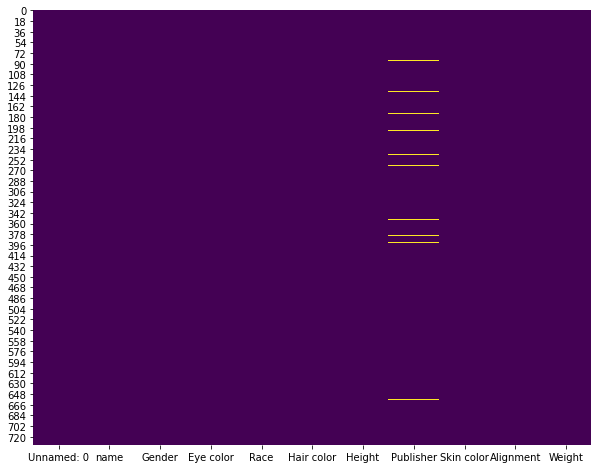

In [4]:
print(hero_info_df.info())
print(hero_info_df.describe())
plt.figure(figsize=(10,8))
ax = sns.heatmap(hero_info_df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [5]:
print(hero_info_df.loc[hero_info_df['Height'] == -99].count())
print(hero_info_df.loc[hero_info_df['Weight'] == -99].count())
hero_info_df = hero_info_df.replace({-99: np.nan})
hero_info_df

Unnamed: 0    217
name          217
Gender        217
Eye color     217
Race          217
Hair color    217
Height        217
Publisher     208
Skin color    217
Alignment     217
Weight        217
dtype: int64
Unnamed: 0    237
name          237
Gender        237
Eye color     237
Race          237
Hair color    237
Height        237
Publisher     225
Skin color    237
Alignment     237
Weight        237
dtype: int64


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,-,bad,NaN
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,NaN
731,731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [6]:
print(hero_info_df['Skin color'].unique())
hero_info_df = hero_info_df.replace({'-': np.nan})
hero_info_df

['-' 'blue' 'red' 'black' 'grey' 'gold' 'green' 'white' 'pink' 'silver'
 'red / black' 'yellow' 'purple' 'orange / white' 'gray' 'blue-white'
 'orange']


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,NaN,bad,NaN
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,NaN,good,52.0
730,730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,NaN
731,731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,NaN,good,57.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      705 non-null    object 
 3   Eye color   562 non-null    object 
 4   Race        430 non-null    object 
 5   Hair color  562 non-null    object 
 6   Height      517 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  72 non-null     object 
 9   Alignment   727 non-null    object 
 10  Weight      495 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB
None
       Unnamed: 0      Height      Weight
count  734.000000  517.000000  495.000000
mean   366.500000  186.726306  112.252525
std    212.031837   59.251895  104.151142
min      0.000000   15.200000    2.000000
25%    183.250000  173.000000   61.000000
50%    366.500000  183.000000   81.000000


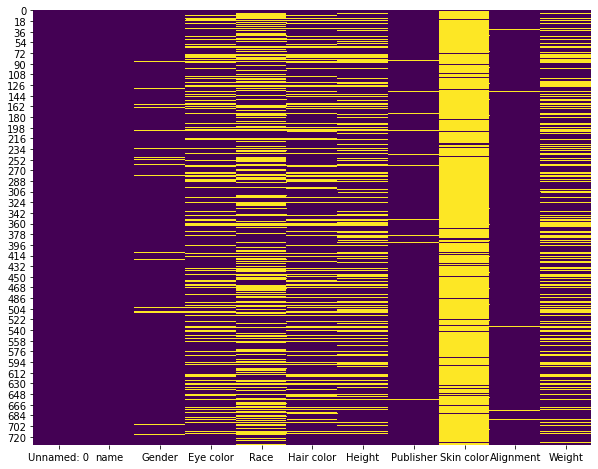

In [7]:
print(hero_info_df.info())
print(hero_info_df.describe())
plt.figure(figsize=(10,8))
ax = sns.heatmap(hero_info_df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [8]:
hero_info_df = hero_info_df.drop(columns = ['Race', 'Height', 'Weight', 'Skin color'])
hero_info_df

,Unnamed: 0,name,Gender,Eye color,Hair color,Publisher,Alignment
0,0,A-Bomb,Male,yellow,No Hair,Marvel Comics,good
1,1,Abe Sapien,Male,blue,No Hair,Dark Horse Comics,good
2,2,Abin Sur,Male,blue,No Hair,DC Comics,good
3,3,Abomination,Male,green,No Hair,Marvel Comics,bad
4,4,Abraxas,Male,blue,Black,Marvel Comics,bad
...,...,...,...,...,...,...,...
729,729,Yellowjacket II,Female,blue,Strawberry Blond,Marvel Comics,good
730,730,Ymir,Male,white,No Hair,Marvel Comics,good
731,731,Yoda,Male,brown,White,George Lucas,good
732,732,Zatanna,Female,blue,Black,DC Comics,good


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  734 non-null    int64 
 1   name        734 non-null    object
 2   Gender      705 non-null    object
 3   Eye color   562 non-null    object
 4   Hair color  562 non-null    object
 5   Publisher   719 non-null    object
 6   Alignment   727 non-null    object
dtypes: int64(1), object(6)
memory usage: 40.3+ KB
None
       Unnamed: 0
count  734.000000
mean   366.500000
std    212.031837
min      0.000000
25%    183.250000
50%    366.500000
75%    549.750000
max    733.000000


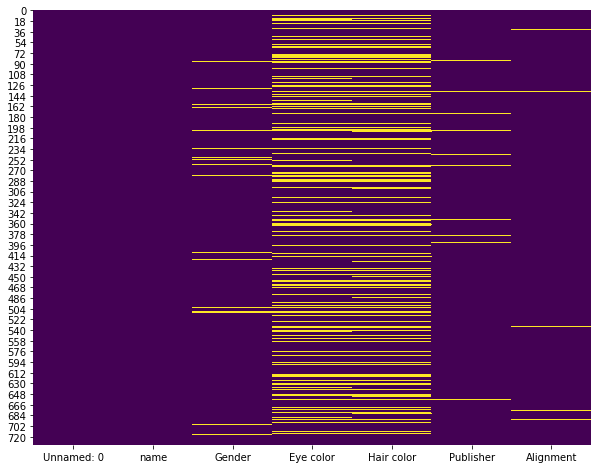

In [9]:
print(hero_info_df.info())
print(hero_info_df.describe())
plt.figure(figsize=(10,8))
ax = sns.heatmap(hero_info_df.isnull(), cbar=False, cmap='viridis')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 0 to 733
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  522 non-null    int64 
 1   name        522 non-null    object
 2   Gender      522 non-null    object
 3   Eye color   522 non-null    object
 4   Hair color  522 non-null    object
 5   Publisher   522 non-null    object
 6   Alignment   522 non-null    object
dtypes: int64(1), object(6)
memory usage: 32.6+ KB
None
       Unnamed: 0
count  522.000000
mean   373.178161
std    213.017812
min      0.000000
25%    193.250000
50%    375.500000
75%    561.750000
max    733.000000


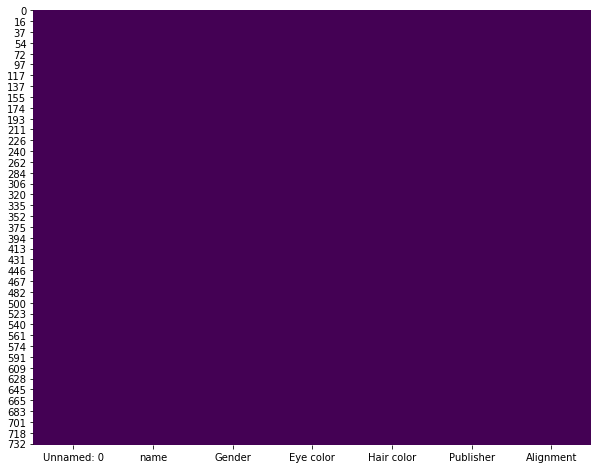

In [10]:
hero_info_df = hero_info_df.dropna()
print(hero_info_df.info())
print(hero_info_df.describe())
plt.figure(figsize=(10,8))
ax = sns.heatmap(hero_info_df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [11]:
hero_and_powers_df = hero_info_df.merge(powers_df, left_on='name', right_on='hero_names')
hero_and_powers_df

,Unnamed: 0,name,Gender,Eye color,Hair color,Publisher,Alignment,hero_names,Agility,Accelerated Healing,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,A-Bomb,Male,yellow,No Hair,Marvel Comics,good,A-Bomb,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1,Abe Sapien,Male,blue,No Hair,Dark Horse Comics,good,Abe Sapien,True,True,...,False,False,False,False,False,False,False,False,False,False
2,2,Abin Sur,Male,blue,No Hair,DC Comics,good,Abin Sur,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,Abomination,Male,green,No Hair,Marvel Comics,bad,Abomination,False,True,...,False,False,False,False,False,False,False,False,False,False
4,4,Abraxas,Male,blue,Black,Marvel Comics,bad,Abraxas,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,729,Yellowjacket II,Female,blue,Strawberry Blond,Marvel Comics,good,Yellowjacket II,False,False,...,False,False,False,False,False,False,False,False,False,False
493,730,Ymir,Male,white,No Hair,Marvel Comics,good,Ymir,False,False,...,False,False,False,False,False,False,False,False,False,False
494,731,Yoda,Male,brown,White,George Lucas,good,Yoda,True,False,...,False,False,False,False,False,False,False,False,False,False
495,732,Zatanna,Female,blue,Black,DC Comics,good,Zatanna,False,False,...,False,False,False,False,False,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 496
Columns: 175 entries, Unnamed: 0 to Omniscient
dtypes: bool(167), int64(1), object(7)
memory usage: 116.0+ KB
None
       Unnamed: 0
count   497.00000
mean    372.45674
std     212.30090
min       0.00000
25%     194.00000
50%     377.00000
75%     561.00000
max     733.00000


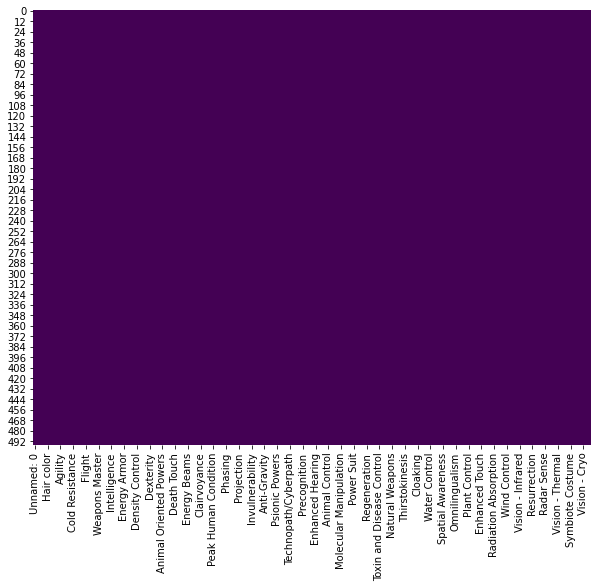

In [12]:
hero_and_powers_df = hero_and_powers_df.dropna()
print(hero_and_powers_df.info())
print(hero_and_powers_df.describe())
plt.figure(figsize=(10,8))
ax = sns.heatmap(hero_and_powers_df.isnull(), cbar=False, cmap='viridis')
plt.show()

Once all the NaN values were removed and the data merged. I was time to group by hair color. However, this led to a new issue once looking at the data. There were to many fields. I made the decision to just look at the top 10 of hair color and superpowers.

In [13]:
powers_by_hair_df = hero_and_powers_df.groupby(['Hair color']).sum()
powers_by_hair_df = powers_by_hair_df.drop(columns = ['Unnamed: 0'])
powers_by_hair_df

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Hair color,,,,,,,,,,,,,,,,,,,,,
Auburn,5.0,5.0,0.0,0.0,0.0,4.0,2.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Black,59.0,47.0,4.0,5.0,8.0,57.0,32.0,16.0,55.0,6.0,...,3.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0
Black / Blue,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Blond,45.0,29.0,0.0,3.0,6.0,39.0,21.0,13.0,26.0,8.0,...,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Blue,2.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brown,31.0,13.0,2.0,1.0,5.0,30.0,13.0,3.0,23.0,5.0,...,4.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Brown / White,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brownn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gold,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\gilat\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1440x1152 with 0 Axes>

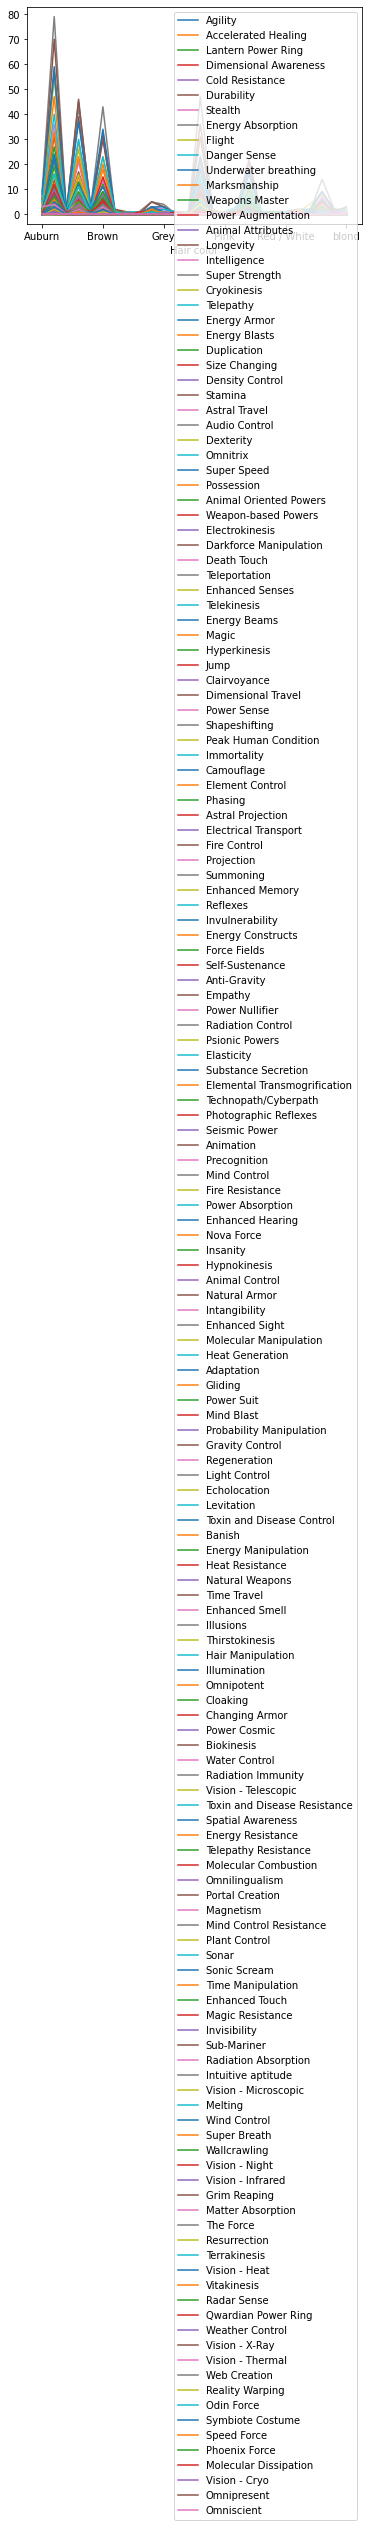

In [14]:
plt.figure(figsize=(20,16))
powers_by_hair_df.plot()
plt.show()

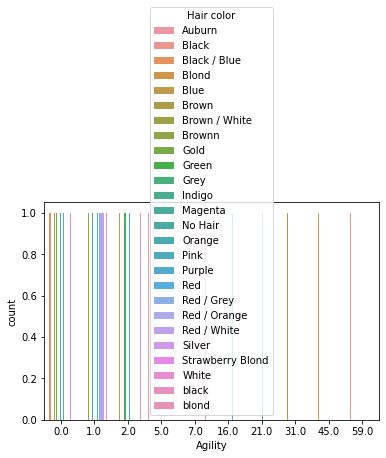

In [15]:
sns.countplot(x='Agility', hue=powers_by_hair_df.index, data=powers_by_hair_df)
plt.show()

In [17]:
hair_power_df = hero_info_df[['name','Hair color']]
hair_power_df = hair_power_df.merge(powers_df, left_on='name', right_on='hero_names')
hair_power_df = pd.get_dummies(hair_power_df, columns=['Hair color'])
hair_power_df

,name,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,...,Hair color_Purple,Hair color_Red,Hair color_Red / Grey,Hair color_Red / Orange,Hair color_Red / White,Hair color_Silver,Hair color_Strawberry Blond,Hair color_White,Hair color_black,Hair color_blond
0,A-Bomb,A-Bomb,False,True,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
1,Abe Sapien,Abe Sapien,True,True,False,False,True,True,False,False,...,0,0,0,0,0,0,0,0,0,0
2,Abin Sur,Abin Sur,False,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,Abomination,Abomination,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,Abraxas,Abraxas,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Yellowjacket II,Yellowjacket II,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,1,0,0,0
493,Ymir,Ymir,False,False,False,False,True,True,False,False,...,0,0,0,0,0,0,0,0,0,0
494,Yoda,Yoda,True,False,False,False,False,False,True,False,...,0,0,0,0,0,0,0,1,0,0
495,Zatanna,Zatanna,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


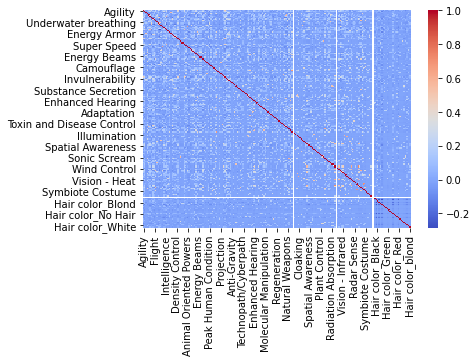

In [18]:
sns.heatmap(hair_power_df.corr(), cmap='coolwarm')
plt.show()

In [19]:
powers_by_hair_df.sum().nlargest(10)

Super Strength         285.0
Stamina                238.0
Durability             215.0
Super Speed            207.0
Agility                202.0
Flight                 169.0
Accelerated Healing    148.0
Reflexes               147.0
Intelligence           122.0
Energy Blasts          120.0
dtype: float64

In [20]:
hair_color_df = hero_and_powers_df['Hair color']
hair_color_df = pd.get_dummies(hair_color_df)
hair_color_df

,Auburn,Black,Black / Blue,Blond,Blue,Brown,Brown / White,Brownn,Gold,Green,...,Purple,Red,Red / Grey,Red / Orange,Red / White,Silver,Strawberry Blond,White,black,blond
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
495,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
hair_color_df.sum().nlargest(10)

Black               141
Blond                85
Brown                78
No Hair              63
Red                  47
White                21
Auburn               13
Green                 8
Strawberry Blond      6
Brown / White         4
dtype: int64

In [22]:
powers_by_hair_df = powers_by_hair_df[['Super Strength', 'Stamina', 'Durability', 'Super Speed', 'Agility', 'Flight', 'Accelerated Healing', 'Reflexes', 'Intelligence', 'Energy Blasts']]
powers_by_hair_df = powers_by_hair_df.reset_index()
powers_by_hair_df = powers_by_hair_df[(powers_by_hair_df['Hair color'].isin(['Black', 'Blond', 'Brown', 'No Hair', 'Red', 'White', 'Auburn', 'Green', 'Strawberry Blond', 'Brown / White']))]
powers_by_hair_df

,Hair color,Super Strength,Stamina,Durability,Super Speed,Agility,Flight,Accelerated Healing,Reflexes,Intelligence,Energy Blasts
0,Auburn,9.0,6.0,4.0,8.0,5.0,5.0,5.0,5.0,4.0,3.0
1,Black,79.0,70.0,57.0,57.0,59.0,55.0,47.0,40.0,36.0,33.0
3,Blond,43.0,46.0,39.0,37.0,45.0,26.0,29.0,30.0,22.0,23.0
5,Brown,43.0,32.0,30.0,34.0,31.0,23.0,13.0,23.0,14.0,20.0
6,Brown / White,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
9,Green,5.0,5.0,5.0,3.0,2.0,3.0,2.0,1.0,3.0,2.0
13,No Hair,47.0,31.0,36.0,23.0,21.0,23.0,22.0,15.0,19.0,17.0
17,Red,22.0,21.0,18.0,18.0,16.0,12.0,12.0,13.0,9.0,10.0
22,Strawberry Blond,1.0,2.0,1.0,2.0,0.0,4.0,1.0,2.0,0.0,1.0
23,White,14.0,9.0,9.0,9.0,7.0,8.0,6.0,5.0,7.0,5.0


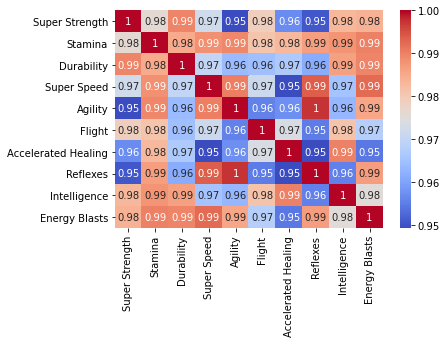

In [23]:
sns.heatmap(powers_by_hair_df.corr(), cmap='coolwarm', annot=True)
plt.show()

After the data is ready it is time to get it into a matrix since that is the way the chord program needs the data to create the Chord Diagram. There is an issue with the import chord there is a free version and a paid version. It is based off the d3.js, there is also an R package that is based off the same thing. Since this is the free version if you call it too many times it will lock up and tell you to buy the full version. I did not buy the full version and just waited to run it again it is a timer thing. Anohter way around it that I discovered way to late is that once you have the HTML file you can just edit the file and it won't tell you to buy the full version. 

In [24]:
matrix = powers_by_hair_df.corr()
matrix

,Super Strength,Stamina,Durability,Super Speed,Agility,Flight,Accelerated Healing,Reflexes,Intelligence,Energy Blasts
Super Strength,1.000000,0.976172,0.989866,0.972078,0.949310,0.978914,0.956856,0.950633,0.983201,0.984077
Stamina,0.976172,1.000000,0.984956,0.988315,0.989396,0.981167,0.982882,0.986713,0.987933,0.990170
Durability,0.989866,0.984956,1.000000,0.969957,0.963946,0.964547,0.966825,0.961492,0.986350,0.989860
Super Speed,0.972078,0.988315,0.969957,1.000000,0.990297,0.971662,0.949360,0.993848,0.965519,0.992657
Agility,0.949310,0.989396,0.963946,0.990297,1.000000,0.955685,0.957268,0.997560,0.963221,0.985718
Flight,0.978914,0.981167,0.964547,0.971662,0.955685,1.000000,0.973669,0.954982,0.981313,0.968042
Accelerated Healing,0.956856,0.982882,0.966825,0.949360,0.957268,0.973669,1.000000,0.949287,0.990193,0.954521
Reflexes,0.950633,0.986713,0.961492,0.993848,0.997560,0.954982,0.949287,1.000000,0.955585,0.986904
Intelligence,0.983201,0.987933,0.986350,0.965519,0.963221,0.981313,0.990193,0.955585,1.000000,0.975390
Energy Blasts,0.984077,0.990170,0.989860,0.992657,0.985718,0.968042,0.954521,0.986904,0.975390,1.000000


In [25]:
matrix = powers_by_hair_df.corr()
print(matrix)
matrix = matrix.rename_axis(None).rename_axis(None, axis=1)
print(list(powers_by_hair_df.columns))
matrix = matrix.to_numpy()
matrix = matrix.tolist()
matrix

                     Super Strength   Stamina  Durability  Super Speed  \
Super Strength             1.000000  0.976172    0.989866     0.972078   
Stamina                    0.976172  1.000000    0.984956     0.988315   
Durability                 0.989866  0.984956    1.000000     0.969957   
Super Speed                0.972078  0.988315    0.969957     1.000000   
Agility                    0.949310  0.989396    0.963946     0.990297   
Flight                     0.978914  0.981167    0.964547     0.971662   
Accelerated Healing        0.956856  0.982882    0.966825     0.949360   
Reflexes                   0.950633  0.986713    0.961492     0.993848   
Intelligence               0.983201  0.987933    0.986350     0.965519   
Energy Blasts              0.984077  0.990170    0.989860     0.992657   

                      Agility    Flight  Accelerated Healing  Reflexes  \
Super Strength       0.949310  0.978914             0.956856  0.950633   
Stamina              0.989396  0.9811

[[1.0,
  0.9761723809149626,
  0.989865676929601,
  0.972078387138375,
  0.9493100338828422,
  0.9789135529170201,
  0.9568560444068414,
  0.9506330906673203,
  0.9832005428940854,
  0.9840771695349557],
 [0.9761723809149626,
  1.0,
  0.9849564728539666,
  0.9883148880368796,
  0.9893960016468583,
  0.9811669713572356,
  0.9828819393064046,
  0.9867125084846635,
  0.9879327228171786,
  0.9901703001612078],
 [0.989865676929601,
  0.9849564728539666,
  1.0,
  0.969957307014743,
  0.9639456637252534,
  0.9645469680285541,
  0.96682535160304,
  0.9614920404861159,
  0.986349687547566,
  0.989860158603716],
 [0.972078387138375,
  0.9883148880368796,
  0.969957307014743,
  1.0,
  0.9902973592283155,
  0.9716615291864892,
  0.9493596013297136,
  0.9938477067834528,
  0.9655192980545971,
  0.9926571931721095],
 [0.9493100338828422,
  0.9893960016468583,
  0.9639456637252534,
  0.9902973592283155,
  1.0,
  0.955685244599337,
  0.9572684909138202,
  0.9975601567915807,
  0.9632211363235437,
  0.

In [26]:
names = ['Super Strength', 'Stamina', 'Durability', 'Super Speed', 'Agility', 'Flight', 'Accelerated Healing','Reflexes', 'Intelligence', 'Energy Blasts']
chord.Chord(matrix, names).to_html()

In [37]:
matrix = powers_by_hair_df.drop(columns=['Hair color'])
matrix = matrix.rename_axis(None).rename_axis(None, axis=1)
print(list(powers_by_hair_df.columns))
matrix = matrix.to_numpy()
matrix = matrix.tolist()
print(matrix)
chord.Chord(matrix, names).to_html()

['Hair color', 'Super Strength', 'Stamina', 'Durability', 'Super Speed', 'Agility', 'Flight', 'Accelerated Healing', 'Reflexes', 'Intelligence', 'Energy Blasts', 'Auburn', 'Black', 'Blond', 'Brown', 'Brown / White', 'Green', 'No Hair', 'Red', 'Strawberry Blond', 'White']
[[9.0, 6.0, 4.0, 8.0, 5.0, 5.0, 5.0, 5.0, 4.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [79.0, 70.0, 57.0, 57.0, 59.0, 55.0, 47.0, 40.0, 36.0, 33.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [43.0, 46.0, 39.0, 37.0, 45.0, 26.0, 29.0, 30.0, 22.0, 23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [43.0, 32.0, 30.0, 34.0, 31.0, 23.0, 13.0, 23.0, 14.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 5.0, 5.0, 3.0, 2.0, 3.0, 2.0, 1.0, 3.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [47.0, 31.0, 36.0, 23.0, 21.0, 23.0, 22.0, 15.0, 19.0, 17.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [28]:
powers_by_hair_df
# powers_by_hair_df.rename(columns={'Hair color': ''})
hairc_list = list(powers_by_hair_df['Hair color'])
powers_by_hair_df=powers_by_hair_df.assign(**dict.fromkeys(hairc_list, 0))
matrix = powers_by_hair_df.drop(columns=['Hair color'])
matrix = matrix.rename_axis(None).rename_axis(None, axis=1)
# print(list(powers_by_hair_df.columns))
matrix = matrix.to_numpy()
# matrix=matrix.tolist()
matrix_flip = np.flip(matrix, 1)
print(matrix_flip)
print(matrix)
the_matrix = np.append(matrix_flip, matrix, axis=0)
the_matrix = the_matrix.tolist()
the_matrix

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  4.  5.  5.  5.  5.  8.  4.
   6.  9.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 33. 36. 40. 47. 55. 59. 57. 57.
  70. 79.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 23. 22. 30. 29. 26. 45. 37. 39.
  46. 43.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20. 14. 23. 13. 23. 31. 34. 30.
  32. 43.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  1.  0.
   1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  3.  1.  2.  3.  2.  3.  5.
   5.  5.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 17. 19. 15. 22. 23. 21. 23. 36.
  31. 47.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  9. 13. 12. 12. 16. 18. 18.
  21. 22.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  2.  1.  4.  0.  2.  1.
   2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  7.  5.  6.  8.  7.  9.  9.
   9. 14.]]
[[ 9.  6.  4.  8.  5.  5.  5.  5.  4.  3.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [79. 70. 57. 57. 59. 55. 47. 40. 36. 33.  0.  0.  0.  0.  0.  0

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  4.0,
  5.0,
  5.0,
  5.0,
  5.0,
  8.0,
  4.0,
  6.0,
  9.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  33.0,
  36.0,
  40.0,
  47.0,
  55.0,
  59.0,
  57.0,
  57.0,
  70.0,
  79.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  23.0,
  22.0,
  30.0,
  29.0,
  26.0,
  45.0,
  37.0,
  39.0,
  46.0,
  43.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  20.0,
  14.0,
  23.0,
  13.0,
  23.0,
  31.0,
  34.0,
  30.0,
  32.0,
  43.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  3.0,
  1.0,
  2.0,
  3.0,
  2.0,
  3.0,
  5.0,
  5.0,
  5.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  17.0,
  19.0,
  15.0,
  22.0,
  23.0,
  21.0,
  23.0

In [38]:
names = ['Super Strength', 'Stamina', 'Durability', 'Super Speed', 'Agility', 'Flight', 'Accelerated Healing',
         'Reflexes', 'Intelligence', 'Energy Blasts', 'Auburn', 'Black', 'Blond', 'Brown', 'Brown / White',
         'Green', 'No Hair', 'Red', 'Strawberry Blond', 'White']
color = color = ["#5bff33", "#33c1ff", "#d733ff", "#ff7133", "#00cd00", "#ff2d42","#ffea2d", "#2dff81", "#ff2dab", "#2d42ff",
                 "#A62A2A","#000000", "#FFE303", "#8B4500", "#EEB4B4", "#3E7A5E", "#403e7a","#ff0f00", "#FFA812", "#CDC0B0"]
chord.Chord(the_matrix, names, width=999, wrap_labels=False, colors=color).to_html()

And there it the code above makes the Chord Diagram. However, I wanted to make a cooler looking diagram a Split Chord Diagram. To do this I need to manipulate the input matrix. After a lot of trial and error, mostly error, I had to hard code it. I am not proud of that and I have made a note to practice more with matrixes. The below code makes a blank area in the diagram making it appear to be split. The final cell adds the title to the HTML file and can be ran after any of the Chord calls as they all save under out.html.  

In [30]:
test_matrix=[
 [ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0,  3.0,  4.0,  5.0,  5.0,  5.0,  5.0,  8.0,  4.0, 6.0,  9.0, 0.0],
 [ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0, 33.0, 36.0, 40.0, 47.0, 55.0, 59.0, 57.0, 57.0,  70.0, 79.0, 0.0],
 [ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0, 23.0, 22.0, 30.0, 29.0, 26.0, 45.0, 37.0, 39.0,  46.0, 43.0, 0.0],
 [ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0, 20.0, 14.0, 23.0, 13.0, 23.0, 31.0, 34.0, 30.0,  32.0, 43.0, 0.0],
 [ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0,  0.0,  0.0,  1.0,  1.0,  1.0,  0.0,  1.0,  0.0, 1.0,  0.0, 0.0],
 [ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0,  2.0,  3.0,  1.0,  2.0,  3.0,  2.0,  3.0,  5.0, 5.0,  5.0, 0.0],
 [ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0, 17.0, 19.0, 15.0, 22.0, 23.0, 21.0, 23.0, 36.0,  31.0, 47.0, 0.0],
 [ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0, 10.0,  9.0, 13.0, 12.0, 12.0, 16.0, 18.0, 18.0,  21.0, 22.0, 0.0],
 [ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0,  1.0,  0.0,  2.0,  1.0,  4.0,  0.0,  2.0,  1.0, 2.0,  1.0, 0.0],
 [ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0,  5.0,  7.0,  5.0,  6.0,  8.0,  7.0,  9.0,  9.0, 9.0, 14.0, 0.0],
 [ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0, 500.0],
 [ 9.0,  6.0,  4.0,  8.0,  5.0,  5.0,  5.0,  5.0,  4.0,  3.0, 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0,  0.0, 0.0],
 [79.0, 70.0, 57.0, 57.0, 59.0, 55.0, 47.0, 40.0, 36.0, 33.0, 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0,  0.0, 0.0],
 [43.0, 46.0, 39.0, 37.0, 45.0, 26.0, 29.0, 30.0, 22.0, 23.0, 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0,  0.0, 0.0],
 [43.0, 32.0, 30.0, 34.0, 31.0, 23.0, 13.0, 23.0, 14.0, 20.0, 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0,  0.0, 0.0],
 [ 0.0,  1.0,  0.0,  1.0,  0.0,  1.0,  1.0,  1.0,  0.0,  0.0, 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0,  0.0, 0.0],
 [ 5.0,  5.0,  5.0,  3.0,  2.0,  3.0,  2.0,  1.0,  3.0,  2.0, 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0,  0.0, 0.0],
 [47.0, 31.0, 36.0, 23.0, 21.0, 23.0, 22.0, 15.0, 19.0, 17.0, 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0,  0.0, 0.0],
 [22.0, 21.0, 18.0, 18.0, 16.0, 12.0, 12.0, 13.0,  9.0, 10.0, 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0,  0.0, 0.0],
 [ 1.0,  2.0,  1.0,  2.0,  0.0,  4.0,  1.0,  2.0,  0.0,  1.0, 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0,  0.0, 0.0],
 [14.0,  9.0,  9.0,  9.0,  7.0,  8.0,  6.0,  5.0,  7.0,  5.0, 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0,  0.0, 0.0],
 [ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 500.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0, 0.0]]
names = ['Super Strength', 'Stamina', 'Durability', 'Super Speed', 'Agility', 'Flight', 'Accelerated Healing',
         'Reflexes', 'Intelligence', 'Energy Blasts', '', 'Auburn', 'Black', 'Blond', 'Brown', 'Brown / White',
         'Green', 'No Hair', 'Red', 'Strawberry Blond', 'White','']
color = ["#5bff33", "#33c1ff", "#d733ff", "#ff7133", "#00cd00", "#ff2d42","#ffea2d", "#2dff81", "#ff2dab", "#2d42ff",
         "#FFFFFF", "#A62A2A","#000000", "#FFE303", "#8B4500", "#EEB4B4", "#3E7A5E", "#403e7a","#ff0f00", "#FFA812", "#CDC0B0","#FFFFFF"]
chord.Chord(test_matrix, names, width=999, wrap_labels=False, colors=color).to_html()

In [31]:
url = open('out.html', 'r')
chord_html = BeautifulSoup(url, 'html.parser')
body = chord_html.find('body')
h1 = chord_html.new_tag('h1')
h1['style']="text-align:center"
h1.string = 'Top 10 Super Hero Hair Color to Top 10 Super Powers'
body.insert(1,h1)
# print(chord_html.prettify())
with open("Godkin_James_Final.html", "w") as file:
    file.write(str(chord_html))
print('Godkin_James_Final.html created')

Godkin_James_Final.html created
